In [1]:
import pandas as pd
import numpy as numpy
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras.datasets import mnist

In [2]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


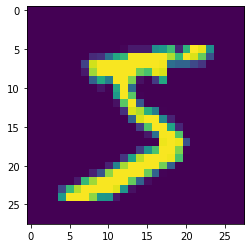

In [3]:
plt.imshow(X_train[0])

In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
X_train = X_train/255
X_test = X_test/255

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Reshape
from tensorflow.keras.optimizers import SGD

In [7]:
encoder = Sequential()
encoder.add(Flatten(input_shape=[28,28]))
encoder.add(Dense(400,activation="relu"))
encoder.add(Dense(200,activation="relu"))
encoder.add(Dense(100,activation="relu"))
encoder.add(Dense(50,activation="relu"))
encoder.add(Dense(25,activation="relu"))

In [8]:
decoder = Sequential()
decoder.add(Dense(50,input_shape=[25],activation='relu'))
decoder.add(Dense(100,activation='relu'))
decoder.add(Dense(200,activation='relu'))
decoder.add(Dense(400,activation='relu'))
decoder.add(Dense(28 * 28, activation="sigmoid"))
decoder.add(Reshape([28, 28]))

In [9]:
auto = Sequential([encoder,decoder])

In [10]:
auto.compile(optimizer=SGD(lr=1.5),loss = "binary_crossentropy",metrics=["accuracy"])

In [11]:
auto.fit(X_train,X_train,epochs=25,validation_data=(X_test,X_test))

Epoch 1/25
1875/1875 [==============================] - 33s 18ms/step - loss: 0.2493 - accuracy: 0.0894 - val_loss: 0.2162 - val_accuracy: 0.1238
Epoch 2/25
1875/1875 [==============================] - 25s 13ms/step - loss: 0.1950 - accuracy: 0.1500 - val_loss: 0.1740 - val_accuracy: 0.1725
Epoch 3/25
1875/1875 [==============================] - 24s 13ms/step - loss: 0.1650 - accuracy: 0.1879 - val_loss: 0.1515 - val_accuracy: 0.2015
Epoch 4/25
1875/1875 [==============================] - 28s 15ms/step - loss: 0.1499 - accuracy: 0.2085 - val_loss: 0.1441 - val_accuracy: 0.2129
Epoch 5/25
1875/1875 [==============================] - 25s 13ms/step - loss: 0.1431 - accuracy: 0.2190 - val_loss: 0.1454 - val_accuracy: 0.2148
Epoch 6/25
1875/1875 [==============================] - 27s 14ms/step - loss: 0.1391 - accuracy: 0.2260 - val_loss: 0.1413 - val_accuracy: 0.2200
Epoch 7/25
1875/1875 [==============================] - 37s 20ms/step - loss: 0.1363 - accuracy: 0.2307 - val_loss: 0.1354 -